<a href="https://colab.research.google.com/github/grkw/mushroom-classifier/blob/main/mushroom_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import Kaggle dataset
import kagglehub
maysee_mushrooms_classification_common_genuss_images_path = kagglehub.dataset_download('maysee/mushrooms-classification-common-genuss-images')

print('Data source import complete.')


100%|██████████| 1.85G/1.85G [00:23<00:00, 83.8MB/s]

Extracting files...


Data source import complete.


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image

dataset_path = os.path.join(maysee_mushrooms_classification_common_genuss_images_path, 'Mushrooms')
print("dataset path: ", maysee_mushrooms_classification_common_genuss_images_path)

classes = os.listdir(dataset_path)
print("classes: ", classes)

labels_map = {
    0: "Suillus",
    1: "Agaricus",
    2: "Russula",
    3: "Boletus",
    4: "Cortinarius",
    5: "Entoloma",
    6: "Hygrocybe",
    7: "Lactarius",
    8: "Amanita",
}

num_imgs_per_class = []
imgs = []
first_img_paths = []
for c in classes:
    class_path = os.path.join(dataset_path, c)
    img_paths = os.listdir(class_path)
    first_img_path = img_paths[0]
    first_img_paths.append(first_img_path)
    num_imgs_per_class.append(len(img_paths))
    img = Image.open(os.path.join(class_path, first_img_path))
    imgs.append(img)

print("# images each class: ", num_imgs_per_class)
# for idx, c in enumerate(classes):
#     print(c, first_img_paths[idx])
#     display(imgs[idx])

dataset path:  /root/.cache/kagglehub/datasets/maysee/mushrooms-classification-common-genuss-images/versions/1
classes:  ['Agaricus', 'Lactarius', 'Entoloma', 'Amanita', 'Suillus', 'Boletus', 'Hygrocybe', 'Russula', 'Cortinarius']
# images each class:  [353, 1563, 364, 750, 311, 1073, 316, 1148, 836]


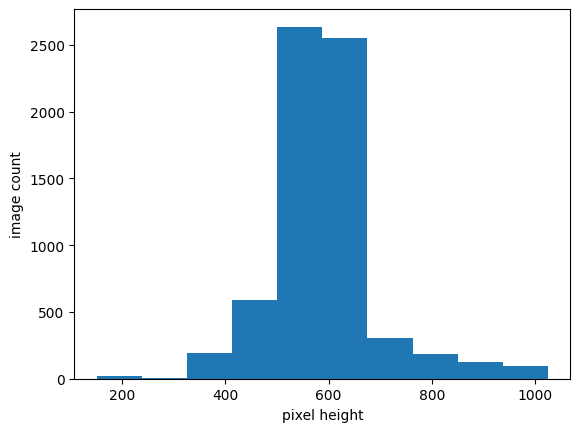

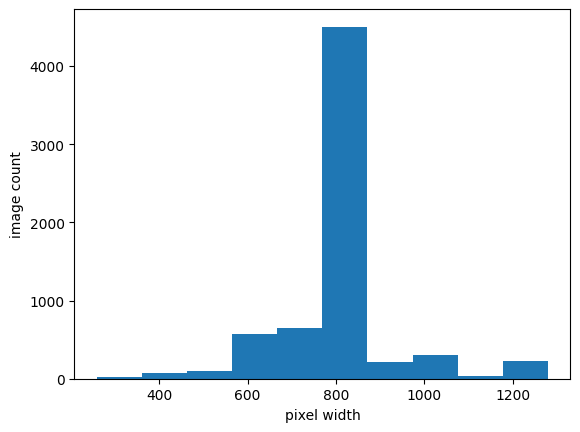

In [4]:
import matplotlib.pyplot as plt

heights = []
widths = []

for dirname, _, filenames in os.walk(dataset_path):
    for filename in filenames:
        path = os.path.join(dirname, filename)
        im = Image.open(path)
        width, height = im.size
        widths.append(width)
        heights.append(height)

plt.hist(heights)
plt.xlabel('pixel height')
plt.ylabel('image count')
plt.show()

plt.hist(widths)
plt.xlabel('pixel width')
plt.ylabel('image count')
plt.show()

In [5]:
CROP_SIZE = 500

# Data pre-processing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [8]:
import shutil
import pandas as pd

# Where all the images will live
consolidated_dir = 'mushrooms'
if not os.path.exists(consolidated_dir):
    os.makedirs(consolidated_dir)

if not os.path.exists(os.path.join(consolidated_dir, 'train')):
    os.makedirs(os.path.join(consolidated_dir, 'train'))

if not os.path.exists(os.path.join(consolidated_dir, 'val')):
    os.makedirs(os.path.join(consolidated_dir, 'val'))

train_df = pd.DataFrame(columns=['filename', 'class'])
val_df = pd.DataFrame(columns=['filename', 'class'])

MIN_CLASS_SIZE_CROPPED = 258
VAL_CLASS_SIZE = 50

# Get the each image, if it's small enough, add it to the new folder and add it to the annotation list
for idx, c in enumerate(classes):
    print("Processing ", c, " folder")
    class_path = os.path.join(dataset_path, c)
    img_paths = os.listdir(class_path)
    big_enough_img_paths = []
    for img_path in img_paths:
        if len(big_enough_img_paths) < MIN_CLASS_SIZE_CROPPED: # still have less than 258/class
          img = Image.open(os.path.join(class_path, img_path))
          height, width = img.size
          if height >= CROP_SIZE and width >= CROP_SIZE:
            if len(big_enough_img_paths) < VAL_CLASS_SIZE: # add to val
              subdir = 'val'
            else: # add to train
              subdir = 'train'
            big_enough_img_paths.append(img_path)
            new_path = os.path.join(consolidated_dir, subdir, img_path)
            shutil.copy(os.path.join(class_path, img_path), new_path) # Move to the dataset folder

    class_train_df = pd.DataFrame({'filename': big_enough_img_paths[50:], 'class': [idx]*len(big_enough_img_paths[50:])})
    train_df = pd.concat([train_df, class_train_df], ignore_index=True)

    class_val_df = pd.DataFrame({'filename': big_enough_img_paths[:50], 'class': [idx]*len(big_enough_img_paths[:50])})
    val_df = pd.concat([val_df, class_val_df], ignore_index=True)

# Create csv of image filename, classification
train_df.to_csv("annotations_file_train.csv", index=False, header=False)
val_df.to_csv("annotations_file_val.csv", index=False, header=False)

Processing  Agaricus  folder
Processing  Lactarius  folder
Processing  Entoloma  folder
Processing  Amanita  folder
Processing  Suillus  folder
Processing  Boletus  folder
Processing  Hygrocybe  folder
Processing  Russula  folder
Processing  Cortinarius  folder


In [6]:
# shutil.rmtree('mushrooms')

NameError: name 'shutil' is not defined

In [9]:
print("num images in train dataset: ", len(os.listdir(os.path.join(consolidated_dir, 'train'))))
print("num images in val dataset: ", len(os.listdir(os.path.join(consolidated_dir, 'val'))))
print("num train annotations in dataset: ", len(train_df))
print("num val annotations in dataset: ", len(val_df))
print("num labelled data per train class:")
for idx, c in enumerate(classes):
    print(c, len(train_df[train_df['class'] == idx]))

print("num labelled data per val class:")
for idx, c in enumerate(classes):
    print(c, len(val_df[val_df['class'] == idx]))

num images in train dataset:  1872
num images in val dataset:  450
num train annotations in dataset:  1872
num val annotations in dataset:  450
num labelled data per train class:
Agaricus 208
Lactarius 208
Entoloma 208
Amanita 208
Suillus 208
Boletus 208
Hygrocybe 208
Russula 208
Cortinarius 208
num labelled data per val class:
Agaricus 50
Lactarius 50
Entoloma 50
Amanita 50
Suillus 50
Boletus 50
Hygrocybe 50
Russula 50
Cortinarius 50


In [10]:
from torchvision.io import decode_image
from torch.utils.data import Dataset

class MushroomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = decode_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [13]:
from torchvision import transforms

transform_img = transforms.Compose([
 transforms.CenterCrop(CROP_SIZE),
])

training_data = MushroomImageDataset(annotations_file="annotations_file_train.csv", img_dir="mushrooms/train", transform=transform_img)
validation_data = MushroomImageDataset(annotations_file="annotations_file_val.csv", img_dir="mushrooms/val", transform=transform_img)

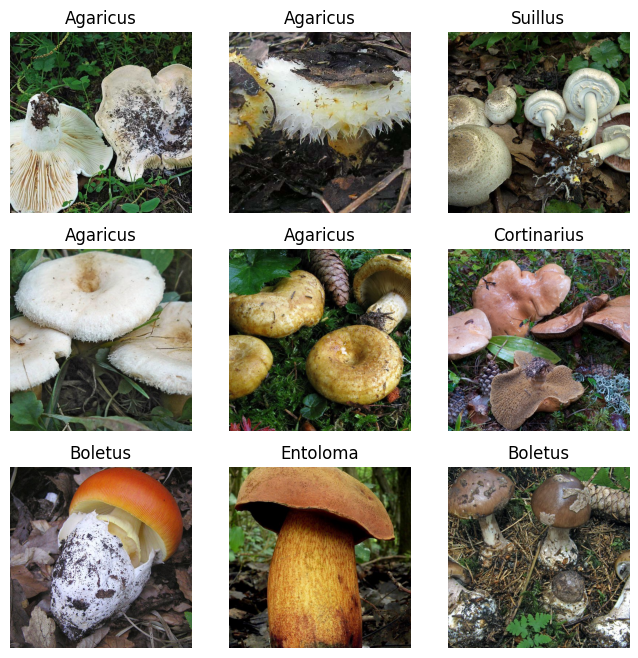

In [14]:
import torch

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    img = img.permute(1, 2, 0)
    plt.imshow(img.squeeze())
plt.show()

In [15]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=32, shuffle=True)
val_dataloader = DataLoader(validation_data, batch_size=16, shuffle=True)

train_inputs, train_labels = next(iter(train_dataloader))
print("Train dataloader")
print(f"features batch shape: {train_inputs.size()}")
print(f"labels batch shape: {train_labels.size()}")
print(f"features datatype: {train_inputs.dtype}")
print(f"labels datatype: {train_labels.dtype}")

val_inputs, val_labels = next(iter(val_dataloader))
print("Val dataloader")
print(f"features batch shape: {val_inputs.size()}")
print(f"labels batch shape: {val_labels.size()}")
print(f"features datatype: {val_inputs.dtype}")
print(f"labels datatype: {val_labels.dtype}")

Train dataloader
features batch shape: torch.Size([32, 3, 500, 500])
labels batch shape: torch.Size([32])
features datatype: torch.uint8
labels datatype: torch.int64
Val dataloader
features batch shape: torch.Size([16, 3, 500, 500])
labels batch shape: torch.Size([16])


In [ ]:
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

class CNNStateSelector(nn.Module):
    def __init__(self):
        super(CNNStateSelector, self).__init__()
        self.conv1 = nn.Conv1d(1, 20, 5)
        self.conv2 = nn.Conv1d(20, 50, 5)
        self.fc1 = nn.Linear(50, 10)
        self.fc2 = nn.Linear(10, 1)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool1d(x, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool1d(x, 2)
        x = x.view(-1, 50)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = self.Softmax(x)
        return x